<a href="https://colab.research.google.com/github/na2027/CE888/blob/main/Copy_of_bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df_bank=pd.read_csv("/content/bank-additional-full.csv",sep=';')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [31]:
df_bank.isnull().values.any().sum()

0

In [5]:
df_bank = df_bank.dropna()

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Exploratory Analysis:**
First we will explore the Categorical Variables:


In [7]:
# find categorical feautres from the given dataset.

cat_features = [var for var in df_bank.columns if df_bank[var].dtype=='O']

print('There are {} categorical features\n'.format(len(cat_features)))

print('The categorical features are :', cat_features)

There are 11 categorical features

The categorical features are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [9]:
# find numerical feautres from the given dataset.

num_features = [var for var in df_bank.columns if df_bank[var].dtype!='O']

print('There are {} numerical features\n'.format(len(num_features)))

There are 10 numerical features



In [10]:
df_bank[cat_features].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


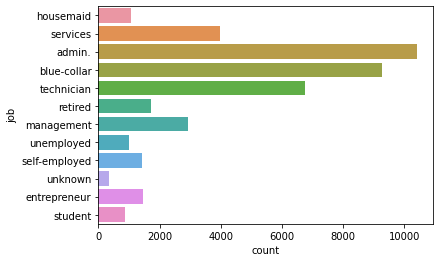

In [11]:
print(df_bank.job.value_counts())
sns.countplot(y='job', data=df_bank)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


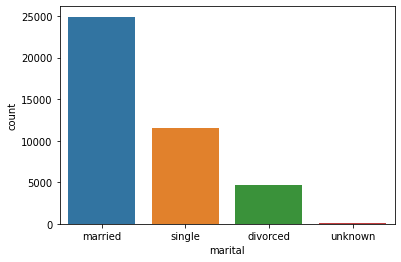

In [ ]:
print(df_bank.marital.value_counts())
sns.countplot(x='marital', data=df_bank)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


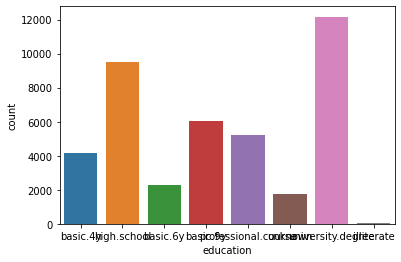

In [ ]:
print(df_bank.education.value_counts())
sns.countplot(x='education', data=df_bank)

In [ ]:
y_valus ={'yes' : 1, 'no' : 0}
df_bank['y'] = df_bank['y'].map(lambda x: y_valus[x])
df_bank['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df_bank.shape

(41188, 21)

In [13]:
#We will take out those column which will affect more to our model
feature_columns=['job','education', 'default', 'housing', 'loan',
           'month', 'day_of_week', 'pdays', 'duration',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','y']

In [14]:
#Encode the categorical data
for col in df_bank.columns:
    if df_bank[col].dtype==object:
           df_bank[col]=df_bank[col].astype('category')
           df_bank[col]=df_bank[col].cat.codes

In [15]:
df_bank[feature_columns].head()

,job,education,default,housing,loan,month,day_of_week,pdays,duration,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,3,0,0,0,0,6,1,999,261,0,1,1.1,93.994,-36.4,4.857,0
1,7,3,1,0,0,6,1,999,149,0,1,1.1,93.994,-36.4,4.857,0
2,7,3,0,2,0,6,1,999,226,0,1,1.1,93.994,-36.4,4.857,0
3,0,1,0,0,0,6,1,999,151,0,1,1.1,93.994,-36.4,4.857,0
4,7,3,0,0,2,6,1,999,307,0,1,1.1,93.994,-36.4,4.857,0


In [16]:
# Before moving ahead we need to normalize the data or scale the given dataset
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

df_bank_feature_columns=df_bank[feature_columns]
feature_array = df_bank_feature_columns.values
# separate array into features and target columns
X = feature_array[:,0:15]
Y = feature_array[:,15]
scaler = MinMaxScaler(feature_range=(0, 1))

rescale_X = scaler.fit_transform(X)
# let's display the transformed data
numpy.set_printoptions(precision=3)
print(rescale_X[0:5,:])

[[0.273 0.    0.    0.    0.    0.667 0.25  1.    0.053 0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.5   0.    0.    0.667 0.25  1.    0.03  0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.    1.    0.    0.667 0.25  1.    0.046 0.    0.5   0.938
  0.699 0.603 0.957]
 [0.    0.143 0.    0.    0.    0.667 0.25  1.    0.031 0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.    0.    1.    0.667 0.25  1.    0.062 0.    0.5   0.938
  0.699 0.603 0.957]]


In [17]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df_bank_feature_columns.iloc[:,0:15]
Y = df_bank_feature_columns.iloc[:,15]
# split data into train and test sets
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=50)
rf = RandomForestClassifier(max_depth = 6, n_estimators = 400)  
#fitting the model
model = rf.fit(X_train, y_train)

# Let's find which feature is important
total_feature_importance = model.feature_importances_.tolist()
feature_importance = [round(val * 100.0, 2) for val in total_feature_importance]
print(zip(df_bank_feature_columns.columns, feature_importance))

In [18]:
#Getting the score of feature matrix and its target values 
model.score(X_test,y_test)

0.9058023792182569

In [19]:
#lab quiz question
from sklearn.metrics import classification_report
# Model Prediction 
predicted_values = model.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predicted_values))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7304
           1       0.77      0.24      0.37       934

    accuracy                           0.91      8238
   macro avg       0.84      0.62      0.66      8238
weighted avg       0.89      0.91      0.88      8238



In [23]:
# split data into train and test sets
test_size = 0.20
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=test_size,random_state = 50)
rf_400 = RandomForestClassifier(max_depth = 6, n_estimators = 400)  
#fitting the model
model = rf_400.fit(X_train1, y_train1)


In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# KFold cross validation
cv = KFold(n_splits=10)

print(cross_val_score(rf_400, X_train1, y_train1, cv = cv,scoring="f1"))

mean_score = cross_val_score(rf_400, X_train1, y_train1, cv = cv, scoring="f1").mean()
round(mean_score,2)

[0.46  0.438 0.473 0.46  0.464 0.487 0.434 0.486 0.477 0.483]


0.47

In [25]:
# split data into train and test sets
test_size = 0.20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=test_size,random_state = 50)
rf_300 = RandomForestClassifier(max_depth = 6, n_estimators = 300)  
#fitting the model
model = rf_300.fit(X_train2, y_train2)


In [26]:
# KFold cross validation
cv = KFold(n_splits=10)

print(cross_val_score(rf_300, X_train2, y_train2, cv = cv,scoring="f1"))

mean_score = cross_val_score(rf_300, X_train2, y_train2, cv = cv, scoring="f1").mean()
mean_score

[0.355 0.326 0.349 0.359 0.351 0.387 0.366 0.404 0.343 0.393]


0.36610075359954364

In [27]:
# split data into train and test sets
test_size = 0.20
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=test_size,random_state = 60)
rf_100 = RandomForestClassifier(max_depth = 8, n_estimators = 100)  
#fitting the model
model = rf_100.fit(X_train3, y_train3)




In [28]:
# KFold cross validation
cv = KFold(n_splits=10)

print(cross_val_score(rf_100, X_train2, y_train2, cv = cv,scoring="f1"))

mean_score3 = cross_val_score(rf_100, X_train3, y_train3, cv = cv, scoring="f1").mean()
mean_score3

[0.451 0.435 0.459 0.436 0.46  0.45  0.477 0.483 0.471 0.492]


0.4700768879578171

In [29]:
# split data into train and test sets
test_size = 0.20
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y, test_size=test_size,random_state = 50)
rf_400 = RandomForestClassifier(max_depth = 8, n_estimators = 400,random_state = 60)  
#fitting the model
#fitting the model
model = rf_400.fit(X_train4, y_train4)

In [30]:
# KFold cross validation
cv = KFold(n_splits=10)

print(cross_val_score(rf_400, X_train4, y_train4, cv = cv,scoring="f1"))

mean_score4 = cross_val_score(rf_400, X_train4, y_train4, cv = cv, scoring="f1").mean()
mean_score4

[0.46  0.438 0.473 0.46  0.464 0.487 0.434 0.486 0.477 0.483]


0.46632472801617625

In [32]:
features = df_bank.columns
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

[ 8 14  7 10 11 13 12  5  9  6  0  1  2  3  4]
Feature ranking:
1. month (0.396254)
2. poutcome (0.179012)
3. contact (0.083000)
4. duration (0.068320)
5. campaign (0.067816)
6. previous (0.065212)
7. pdays (0.049017)
8. housing (0.028140)
9. day_of_week (0.014652)
10. loan (0.012423)
11. age (0.011936)
12. job (0.011739)
13. marital (0.004781)
14. education (0.003882)
15. default (0.003817)
